# Imports

In [1]:
import pyxdf
import cv2
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import pingouin as pg 
import seaborn as sns

In [2]:

xdf_path = "../Data/Pilots/6_17_2024/sub-P001_ses-S001_task-Default_run-001_eeg_old5.xdf"


In [3]:
data, header = pyxdf.load_xdf(xdf_path)
streams_collected = [stream['info']['name'][0] for stream in data]
streams_collected

Stream 1: Calculated effective sampling rate 9.0677 Hz is different from specified rate 30.0000 Hz.


['WebcamStream']

## Computing the sampling frequency of the webcam data

In [5]:
#stim_data=data[0]
cam_data = data[0]
cam_data['time_stamps'] 
# Use the time stamps to get the sample rate
sample_rate = 1/np.mean(np.diff(cam_data['time_stamps']))
sample_rate

9.045790205787965

In [6]:
# pop off the first element of each array in the data time series
frame = [i[1:] for i in cam_data['time_series']]
timez = [i[0] for i in cam_data['time_series']]

dat = pd.DataFrame({'time':timez, 'frame':frame, 'time_stamps':cam_data['time_stamps']})
# convert the time to a datetime object
dat['datetime'] = dat['time'].apply(lambda x: datetime.utcfromtimestamp(x))
dat

,time,frame,time_stamps,datetime
0,1719333640,"[143, 194, 203, 136, 194, 205, 128, 194, 206, ...",690364.185109,2024-06-25 16:40:40
1,1719333640,"[141, 196, 205, 139, 197, 205, 137, 197, 205, ...",690364.295657,2024-06-25 16:40:40
2,1719333640,"[142, 195, 204, 139, 197, 205, 134, 196, 204, ...",690364.406206,2024-06-25 16:40:40
3,1719333640,"[152, 196, 202, 143, 197, 203, 136, 198, 206, ...",690364.516755,2024-06-25 16:40:40
4,1719333641,"[146, 197, 203, 137, 196, 204, 131, 197, 207, ...",690364.627303,2024-06-25 16:40:41
...,...,...,...,...
284,1719333672,"[153, 219, 229, 151, 220, 231, 147, 219, 231, ...",690395.580929,2024-06-25 16:41:12
285,1719333672,"[159, 219, 227, 155, 221, 228, 150, 221, 228, ...",690395.691477,2024-06-25 16:41:12
286,1719333672,"[155, 219, 229, 155, 220, 229, 155, 222, 230, ...",690395.802026,2024-06-25 16:41:12
287,1719333672,"[161, 219, 227, 158, 220, 228, 154, 221, 228, ...",690395.912574,2024-06-25 16:41:12


In [14]:
test = dat.time[0] * 1000
datetime.utcfromtimestamp(test/1000).replace(microsecond=(test%1000)*1000)
# get more precise time stamps


datetime.datetime(2024, 6, 25, 16, 40, 40)

In [15]:
1/30

0.03333333333333333

In [21]:
# Plot the sampling frequency as a histogram
print(dat['time_stamps'][1])
print(dat['time_stamps'][0])

690364.2956572808
690364.1851086193


## Note the that first element of every entry of 'time_series' is actually a timestamp.

In [26]:
[print(x) for x in dat.time_stamps.diff()[:10]]


nan
0.11054866155609488
0.11054866155609488
0.11054866155609488
0.11054866155609488
0.11054866155609488
0.11054866155609488
0.11054866155609488
0.11054866155609488
0.11054866155609488


[None, None, None, None, None, None, None, None, None, None]

In [37]:

import time
import datetime

datetime.datetime.fromtimestamp(cam_data['time_series'][65].tolist()[0])

datetime.datetime(1969, 12, 31, 19, 0, 5)

In [38]:
frame_array = np.array(data[0]['time_series'][65].tolist()[1:], dtype=np.uint8)
frame_array_reshaped = frame_array.reshape((480, 640, 3))
frame_rgb = cv2.cvtColor(frame_array_reshaped, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis('off')
plt.show()

ValueError: cannot reshape array of size 0 into shape (480,640,3)

In [ ]:
datetime.datetime.fromtimestamp(stim_data['time_series'][1][0])

datetime.datetime(2024, 6, 18, 13, 27, 47)

In [ ]:
print(cam_data['time_series'][65].tolist()[0])
stim_data['time_series'][1][0]

1718731667


1718731667

In [ ]:
datetime.fromtimestamp(int(float(data[0]['footer']['info']['first_timestamp'][0])))

datetime.datetime(1970, 1, 1, 19, 10, 17)

In [ ]:
now = datetime.fromtimestamp(data[0]['time_stamps'][788])#data[0]['time_stamps'][750]
epoch = datetime(1970, 1, 1)
duration_since_epoch = (now - epoch)
#micros_since_epoch = int(duration_since_epoch)
#time_delta = timedelta(microseconds=micros_since_epoch)
epoch + duration_since_epoch

datetime.datetime(1970, 1, 1, 18, 27, 56, 715743)

In [ ]:
now

datetime.datetime(1970, 1, 1, 18, 27, 56, 715743)

In [ ]:
cap = cv2.VideoCapture(vid_path)

In [ ]:
while True:
    ret, frame = cap.read()
    if not ret:
        print("Reached the end of the video.")
        break
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Reached the end of the video.


In [ ]:
cv2.imshow('Frame', frame)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


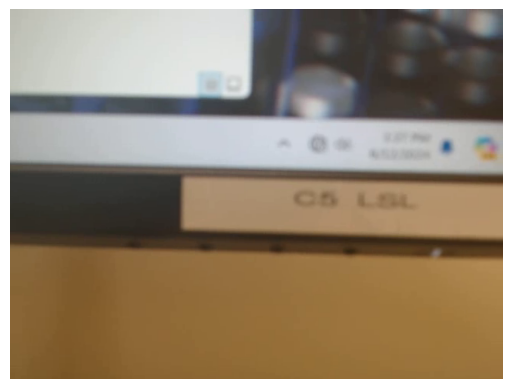

In [ ]:
cap = cv2.VideoCapture(vid_path)
if not cap.isOpened():
    print("Error opening the video")
else:
    frame_number = 800

    # Set the video position to the specified frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    # read the frame
    ret, frame = cap.read()
    if ret:
        #convert the frame from BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.show()
    else:
        print('could not read frame')

    cap.release()

In [ ]:
frame.shape

(480, 640, 3)

In [ ]:
# Total number of frames
cap = cv2.VideoCapture(vid_path)
if not cap.isOpened():
    print("Error opening the video")
else:
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    cap.release()

In [ ]:
frm_numbers = data[0]['time_series']
ts = []

for x in frm_numbers:
    ts.append(x[0])
    #print(x)

In [ ]:
ts.index(1800)

969

In [ ]:
datetime.fromtimestamp(data[0]['time_stamps'][969])

datetime.datetime(1969, 12, 31, 20, 25, 52, 880529)

In [ ]:
data

[{'info': defaultdict(list,
              {'name': ['WebcamStream'],
               'type': ['video'],
               'channel_count': ['1'],
               'channel_format': ['int32'],
               'source_id': ['WebcamStreamID'],
               'nominal_srate': ['30.00000000000000'],
               'version': ['1.100000000000000'],
               'created_at': ['7686.566416400000'],
               'uid': ['110f3212-9af5-45fb-a7f3-ae476bddb192'],
               'session_id': ['default'],
               'hostname': ['C3-EYE-TRACKING'],
               'v4address': [None],
               'v4data_port': ['16572'],
               'v4service_port': ['16572'],
               'v6address': [None],
               'v6data_port': ['16572'],
               'v6service_port': ['16572'],
               'desc': [None],
               'stream_id': 1,
               'effective_srate': 29.994532813108}),
  'footer': {'info': defaultdict(list,
               {'first_timestamp': ['7714.5856968'],
       

In [ ]:
datetime.fromtimestamp(float(data[0]['footer']['info']['first_timestamp'][0]))

datetime.datetime(1969, 12, 31, 21, 8, 34, 585697)

# TESTING THE EFFECT OF LUMINANCE ON PUPILOMETRY  - 6.25.24. Bryan Nathalia Test


In [2]:
xdf_path = "../Data/Pilots/luminance/sub-P001_ses-S001_task-Default_run-001_eyetracking.xdf"


data, header= pyxdf.load_xdf(xdf_path)
streams_collected = [stream['info']['name'][0] for stream in data]
streams_collected

Stream 1: Calculated effective sampling rate 119.9949 Hz is different from specified rate 90.0000 Hz.


['Stimuli_Markers', 'Tobii']

In [3]:
dat = data[1]

In [4]:
len(dat['time_series'])

31860

In [5]:
dat['info']

defaultdict(list,
            {'name': ['Tobii'],
             'type': ['ET'],
             'channel_count': ['31'],
             'channel_format': ['float32'],
             'source_id': ['tobii-prp://TPFC2-010201444964'],
             'nominal_srate': ['90.00000000000000'],
             'version': ['1.100000000000000'],
             'created_at': ['2344337.888169100'],
             'uid': ['a0fe3287-5420-489e-838d-fe0b46586ac4'],
             'session_id': ['default'],
             'hostname': ['C3-EYE-TRACKING'],
             'v4address': [None],
             'v4data_port': ['16572'],
             'v4service_port': ['16572'],
             'v6address': [None],
             'v6data_port': ['16572'],
             'v6service_port': ['16572'],
             'desc': [defaultdict(list,
                          {'manufacturer': ['Tobii'],
                           'channels': [defaultdict(list,
                                        {'channel': [defaultdict(list,
                          

## Finding the stimulus markers

In [7]:
print(data[0]['time_series'])
begining = data[0]['time_series'][1]
switch = data[0]['time_series'][3]
end = data[0]['time_series'][5]

[[         1]
 [1721678425]
 [         2]
 [1721678546]
 [         3]
 [1721678666]]


In [8]:

begin_time = data[0]['time_stamps'][1]
switch_time = data[0]['time_stamps'][3]
end_time = data[0]['time_stamps'][5]
print(end_time)
# finding index of that matches these times from the tobii steam


3035419.852361585


In [9]:
ts = np.array([int(x) for x in data[1]['time_stamps']])
np.where(ts== 705412)


(array([], dtype=int64),)

In [9]:
#tobii_ts = str.format(data[0]['time_stamps'], '.2f')
#tobii_ts

tobii_begin_time = data[1]['time_stamps'][339] # this is the tobii time stamp corresponding to the stimulus begin time
tobii_switch_time = data[1]['time_stamps'][14884]
tobii_end_time = data[1]['time_stamps'][29284]

In [10]:
gray_half = dat['time_series'][339:14884]
green_half = dat['time_series'][14884:29284]

In [11]:
# Get the column names
column_labels = [dat['info']['desc'][0]['channels'][0]['channel'][i]['label'][0] for i in range(len(dat['info']['desc'][0]['channels'][0]['channel']))]

gray_df = pd.DataFrame(data=gray_half, columns=column_labels)
green_df = pd.DataFrame(data=green_half, columns=column_labels)

In [12]:
# removing first and last 10 secs
gray_half = gray_df[1200:]
gray_half = gray_df[:-1200].dropna()

green_half = green_df[1200:]
green_half = green_df[:-1200].dropna() # remove eye blinks



In [13]:
sum([sum(green_half.isna()[col]) for col in column_labels])

0

In [14]:
left_gray = gray_half['left_pupil_diameter'] 
left_green = green_half['left_pupil_diameter'] 
right_gray = gray_half['right_pupil_diameter'] 
right_green = green_half['right_pupil_diameter'] 

In [15]:
#making gray and green the same size by shortening gray
left_gray = left_gray[:len(left_green)]
right_gray = right_gray[:len(right_green)]

## Left eye

In [16]:
left_green = pd.DataFrame(left_green[::120])
left_green['color'] = 'green'
left_gray = pd.DataFrame(left_gray[::120])
left_gray['color'] = 'gray'

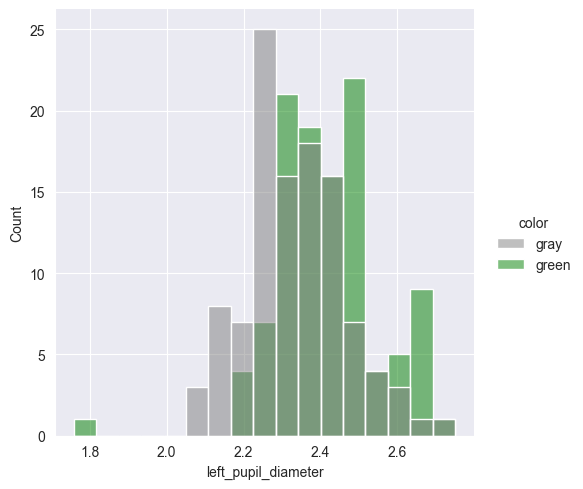

In [17]:


left = pd.concat([left_gray, left_green], )
left_o = left.loc[left.left_pupil_diameter > 1.8]
sns.displot(data=left, hue='color', x='left_pupil_diameter', palette=['#808080', '#008000'])

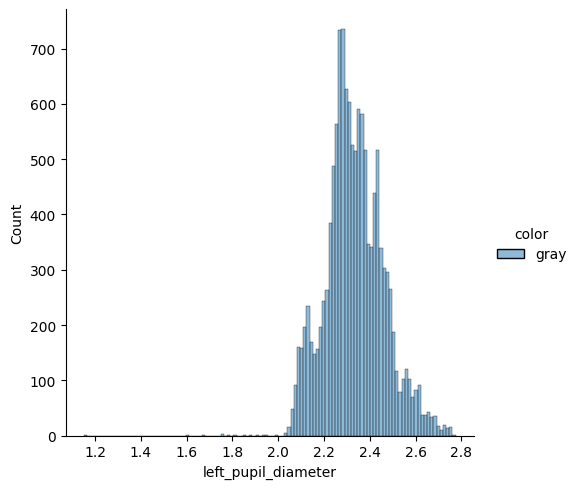

In [30]:
sns.displot(data=left.loc[left.color=='gray'], hue='color', x='left_pupil_diameter')

In [18]:
from scipy import stats

before = left.loc[left.color == 'gray'].left_pupil_diameter.values
after =  left.loc[left.color == 'green'].left_pupil_diameter.values
t_stat, p_val = stats.ttest_rel(before, after)
print(t_stat)
print(f'p value:{p_val:.10}')

-4.708806947376315
p value:7.444949855e-06


In [27]:
left.describe()


,left_pupil_diameter
count,26072.000000
mean,2.375584
std,0.131155
min,1.152527
25%,2.284344
50%,2.365204
75%,2.458744
max,2.806229


In [23]:
pg.ttest(before, after, paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.469982,216,two-sided,0.000013,"[-0.11, -0.04]",0.605491,1317.388,0.993614


NameError: name 'sns' is not defined

# paired ttest

In [17]:
l_gray = left_gray.rename(columns={'left_pupil_diameter':'gray_left_pupil_diameter' })
l_green = left_green.rename(columns={'left_pupil_diameter':'green_left_pupil_diameter' })

pleft = pd.concat([l_gray, l_green], axis=1)
pleft

,gray_left_pupil_diameter,color,green_left_pupil_diameter,color
0,2.699326,gray,2.436554,green
1,2.693115,gray,2.447052,green
2,2.693832,gray,2.449341,green
3,2.696716,gray,2.440491,green
4,2.698532,gray,2.453903,green
...,...,...,...,...
13615,NaN,NaN,3.241898,green
13616,NaN,NaN,3.197464,green
13617,NaN,NaN,3.251907,green
13618,NaN,NaN,3.276917,green


In [22]:
left_diffs = left_gray['left_pupil_diameter'] - left_green['left_pupil_diameter']
pg.ttest(left_diffs, paired=False)

TypeError: ttest() missing 1 required positional argument: 'y'

## Right eye    

In [20]:
right_green = pd.DataFrame(right_green[::120])
right_green['color'] = 'green'
right_gray = pd.DataFrame(right_gray[::120])
right_gray['color'] = 'gray'

right = pd.concat([right_gray, right_green], )

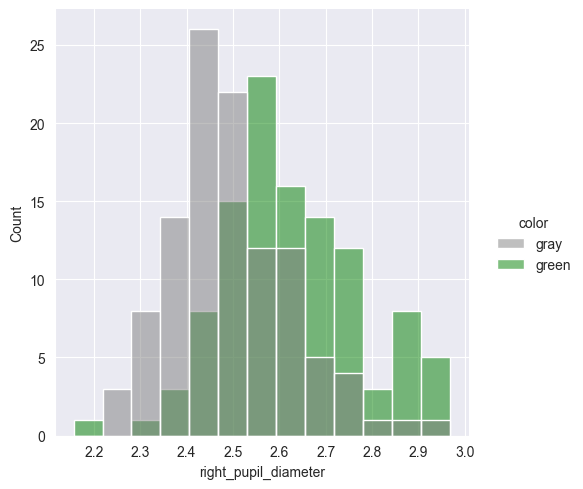

In [22]:
sns.displot(data=right, hue='color', x='right_pupil_diameter', palette=['#808080', '#008000'])


In [21]:
pg.ttest(right_gray['right_pupil_diameter'], right_green['right_pupil_diameter'], paired=False)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-6.84211,216,two-sided,7.924552e-11,"[-0.17, -0.09]",0.926812,1.006e+08,0.999999


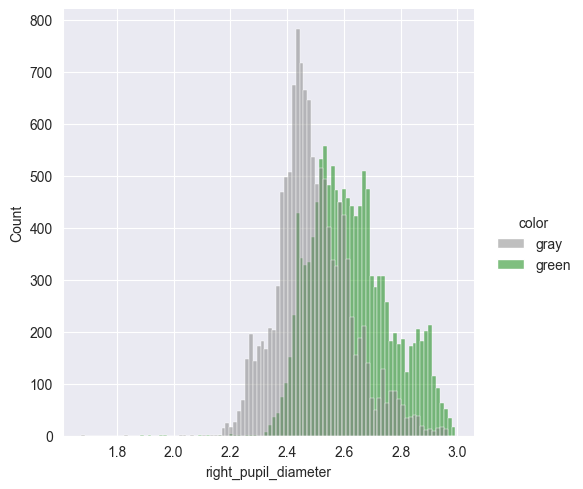

In [23]:
clrs = ['#808080', '#008000']
sns.displot(data=right, hue='color', x='right_pupil_diameter', hue_order=['gray', 'green'], palette=clrs)

In [20]:
right.describe()

,right_pupil_diameter
count,31406.000000
mean,2.827009
std,0.317837
min,1.659378
25%,2.598282
50%,2.760986
75%,2.956650
max,3.850403


In [21]:
left.describe()

,left_pupil_diameter
count,31406.000000
mean,2.724874
std,0.312403
min,1.530197
25%,2.492779
50%,2.651367
75%,2.864475
max,3.969498
